In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
machine_data=pd.read_csv("data.csv")
machine_data

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


Check for nulls

In [4]:
machine_data.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

No nulls

In [5]:
machine_data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


Exploratory Data Analysis

In [6]:
machine_data.groupby('fail')['footfall'].mean()

fail
0    373.150635
1    212.768448
Name: footfall, dtype: float64

In [7]:
machine_data.groupby('fail')['tempMode'].mean()

fail
0    3.760436
1    3.681934
Name: tempMode, dtype: float64

In [8]:
machine_data.groupby('fail')['AQ'].mean()

fail
0    3.617060
1    5.318066
Name: AQ, dtype: float64

In [9]:
machine_data.groupby('fail')['USS'].mean()

fail
0    3.484574
1    2.175573
Name: USS, dtype: float64

In [10]:
machine_data.groupby('fail')['CS'].mean()

fail
0    5.373866
1    5.422392
Name: CS, dtype: float64

In [11]:
machine_data.groupby('fail')['VOC'].mean()

fail
0    1.312160
1    4.987277
Name: VOC, dtype: float64

In [12]:
machine_data.groupby('fail')['RP'].mean()

fail
0    46.299456
1    48.086514
Name: RP, dtype: float64

In [13]:
machine_data.groupby('fail')['IP'].mean()

fail
0    4.450091
1    4.727735
Name: IP, dtype: float64

In [43]:
corr=machine_data.corr()
corr

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
footfall,1.000000,0.020457,-0.065816,0.019453,0.025638,-0.089590,-0.043720,-0.003869,-0.018009,-0.073066
tempMode,0.020457,1.000000,-0.010855,0.002142,-0.013956,-0.052369,0.408784,-0.058109,-0.062568,-0.014462
AQ,-0.065816,-0.010855,1.000000,-0.156884,-0.090010,0.618570,0.094656,-0.105868,0.034328,0.583238
USS,0.019453,0.002142,-0.156884,1.000000,-0.352915,-0.399477,-0.032549,-0.206416,-0.225122,-0.466574
CS,0.025638,-0.013956,-0.090010,-0.352915,1.000000,0.048037,-0.026968,0.185739,0.143972,0.018855
VOC,-0.089590,-0.052369,0.618570,-0.399477,0.048037,1.000000,0.008023,0.103628,0.208956,0.797329
RP,-0.043720,0.408784,0.094656,-0.032549,-0.026968,0.008023,1.000000,-0.158841,-0.078499,0.053668
IP,-0.003869,-0.058109,-0.105868,-0.206416,0.185739,0.103628,-0.158841,1.000000,0.372771,0.085624
Temperature,-0.018009,-0.062568,0.034328,-0.225122,0.143972,0.208956,-0.078499,0.372771,1.000000,0.190257
fail,-0.073066,-0.014462,0.583238,-0.466574,0.018855,0.797329,0.053668,0.085624,0.190257,1.000000


<Axes: >

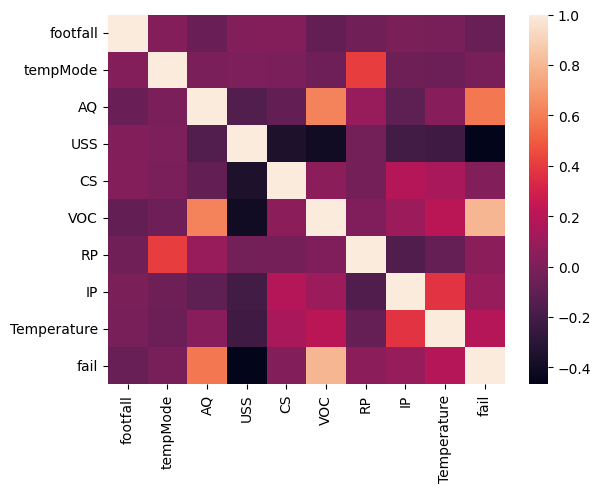

In [42]:
sns.heatmap(corr)

Feature Selection

In [31]:
X=machine_data[['AQ','USS','VOC','Temperature']]
Y=machine_data['fail']

train test split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

Model train and test

Logistic Regression

In [33]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
train_pred=model1.predict(x_train)
test_pred=model1.predict(x_test)
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))


0.9125827814569536
0.9206349206349206


Decision Tree Classifier

In [45]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
train_pred=model2.predict(x_train)
test_pred=model2.predict(x_test)
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

0.9880794701986755
0.8941798941798942


Random Forest Classifier

In [46]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
train_pred=model3.predict(x_train)
test_pred=model3.predict(x_test)
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

0.9880794701986755
0.8941798941798942


c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


KNeighbours Classifier

In [36]:
model4=KNeighborsClassifier()
model4.fit(x_train,y_train)
train_pred=model4.predict(x_train)
test_pred=model4.predict(x_test)
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

0.919205298013245
0.91005291005291


Cat Boost Classifier

In [37]:
model5=CatBoostClassifier()
model5.fit(x_train,y_train)
train_pred=model5.predict(x_train)
test_pred=model5.predict(x_test)
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

Learning rate set to 0.009137
0:	learn: 0.6833483	total: 16.5ms	remaining: 16.5s
1:	learn: 0.6729257	total: 18.4ms	remaining: 9.19s
2:	learn: 0.6627065	total: 20.2ms	remaining: 6.7s
3:	learn: 0.6530709	total: 23.2ms	remaining: 5.78s
4:	learn: 0.6428321	total: 26ms	remaining: 5.18s
5:	learn: 0.6326102	total: 27.5ms	remaining: 4.55s
6:	learn: 0.6231873	total: 29.2ms	remaining: 4.15s
7:	learn: 0.6156795	total: 30ms	remaining: 3.72s
8:	learn: 0.6058738	total: 31.1ms	remaining: 3.43s
9:	learn: 0.5974909	total: 32.2ms	remaining: 3.19s
10:	learn: 0.5899502	total: 33.7ms	remaining: 3.03s
11:	learn: 0.5802879	total: 35.6ms	remaining: 2.93s
12:	learn: 0.5721170	total: 37.9ms	remaining: 2.87s
13:	learn: 0.5632064	total: 39.6ms	remaining: 2.79s
14:	learn: 0.5557570	total: 40.6ms	remaining: 2.67s
15:	learn: 0.5485930	total: 42.6ms	remaining: 2.62s
16:	learn: 0.5411168	total: 44.1ms	remaining: 2.55s
17:	learn: 0.5331426	total: 46ms	remaining: 2.51s
18:	learn: 0.5265931	total: 47.3ms	remaining: 2.44s

Gaussian Naive Bayes

In [38]:
model6=GaussianNB()
model6.fit(x_train,y_train)
train_pred=model6.predict(x_train)
test_pred=model6.predict(x_test)
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

0.9125827814569536
0.9153439153439153


Support Vector Classifier

In [39]:
model7=SVC()
model7.fit(x_train,y_train)
train_pred=model7.predict(x_train)
test_pred=model7.predict(x_test)
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

0.9125827814569536
0.9259259259259259


In [40]:
model=model7

In [51]:
import gradio as gr
def predict(footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature):
    footfall=int(footfall)
    tempMode=int(tempMode)
    AQ=int(AQ)
    USS=int(USS)
    CS=int(CS)
    VOC=int(VOC)
    RP=int(RP)
    IP=int(IP)
    Temperature=int(Temperature)
    features=[[AQ, USS, VOC, Temperature]]
    prediction=model.predict(features)[0]
    if(prediction==1):
        return "Failure (1)"
    else:
        return "No Failure (0)"

demo=gr.Interface(
    fn=predict,
    inputs=[
        "number","number","number","number","number","number","number","number","number"
    ],
    outputs=["text"],
)
demo.launch(share=True)


Running on local URL:  http://127.0.0.1:7866
Running on public URL: https://55b9ba5d7872d6becb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
